In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [2]:
df = pd.read_csv('../labelled_data(K-Means).csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Product_Electronic accessories,Product_Home and lifestyle,Product_Sports and travel,Product_Food and beverages,year,month,day,hour,minute,label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,0,0,0,0,2019,1,5,13,8,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1,0,0,0,2019,3,8,10,29,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,0,1,0,0,2019,3,3,13,23,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,0,0,0,0,2019,1,27,20,33,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,0,0,1,0,2019,2,8,10,37,1


<Axes: ylabel='gross income'>

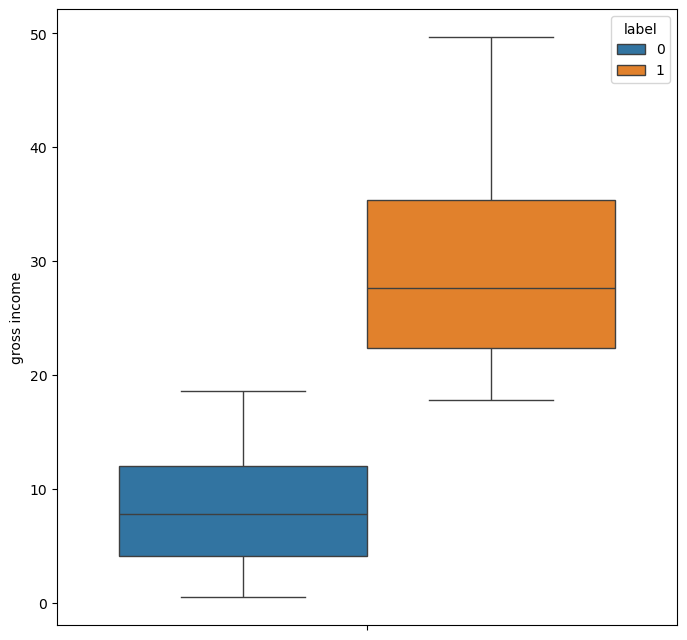

In [3]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='gross income', hue='label')

 0 as "Low Value Customer", 1 as "High Value Customer"

# Exploratory Data Analysis

### BoxPlot

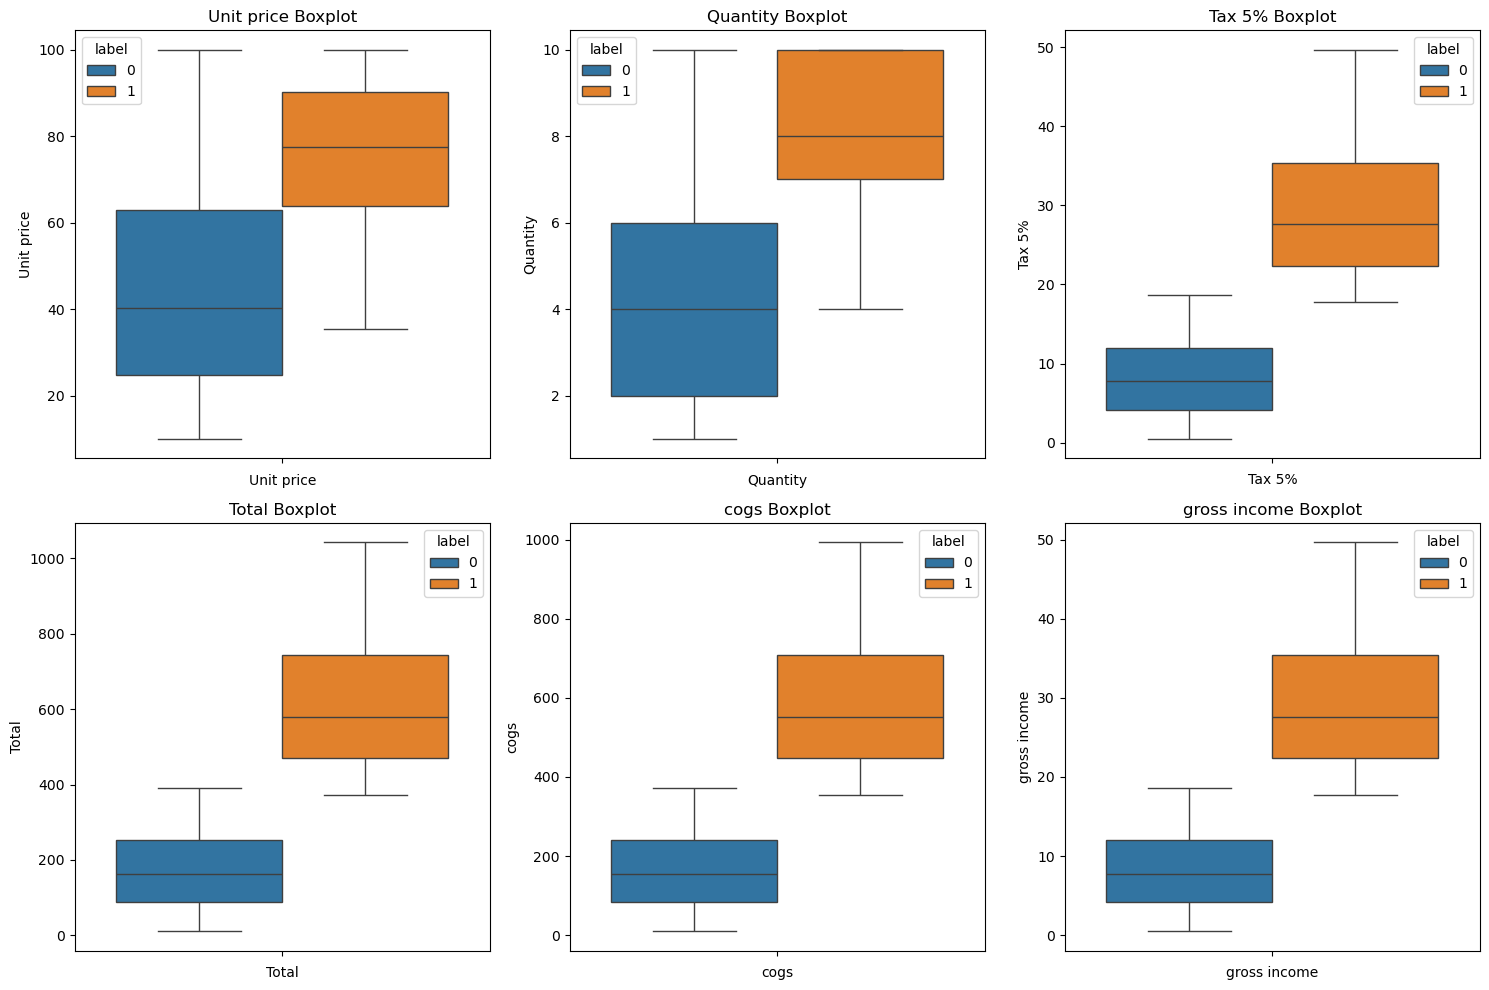

In [4]:
visualise_continuous_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(visualise_continuous_features):
    sns.boxplot(data=df, y=feature, hue='label', ax = axs[i])

    axs[i].set_title(f'{feature} Boxplot')
    axs[i].set_xlabel(feature)

plt.tight_layout()

Customer with label 1 usually have higher value on features related to sales

### Histogram

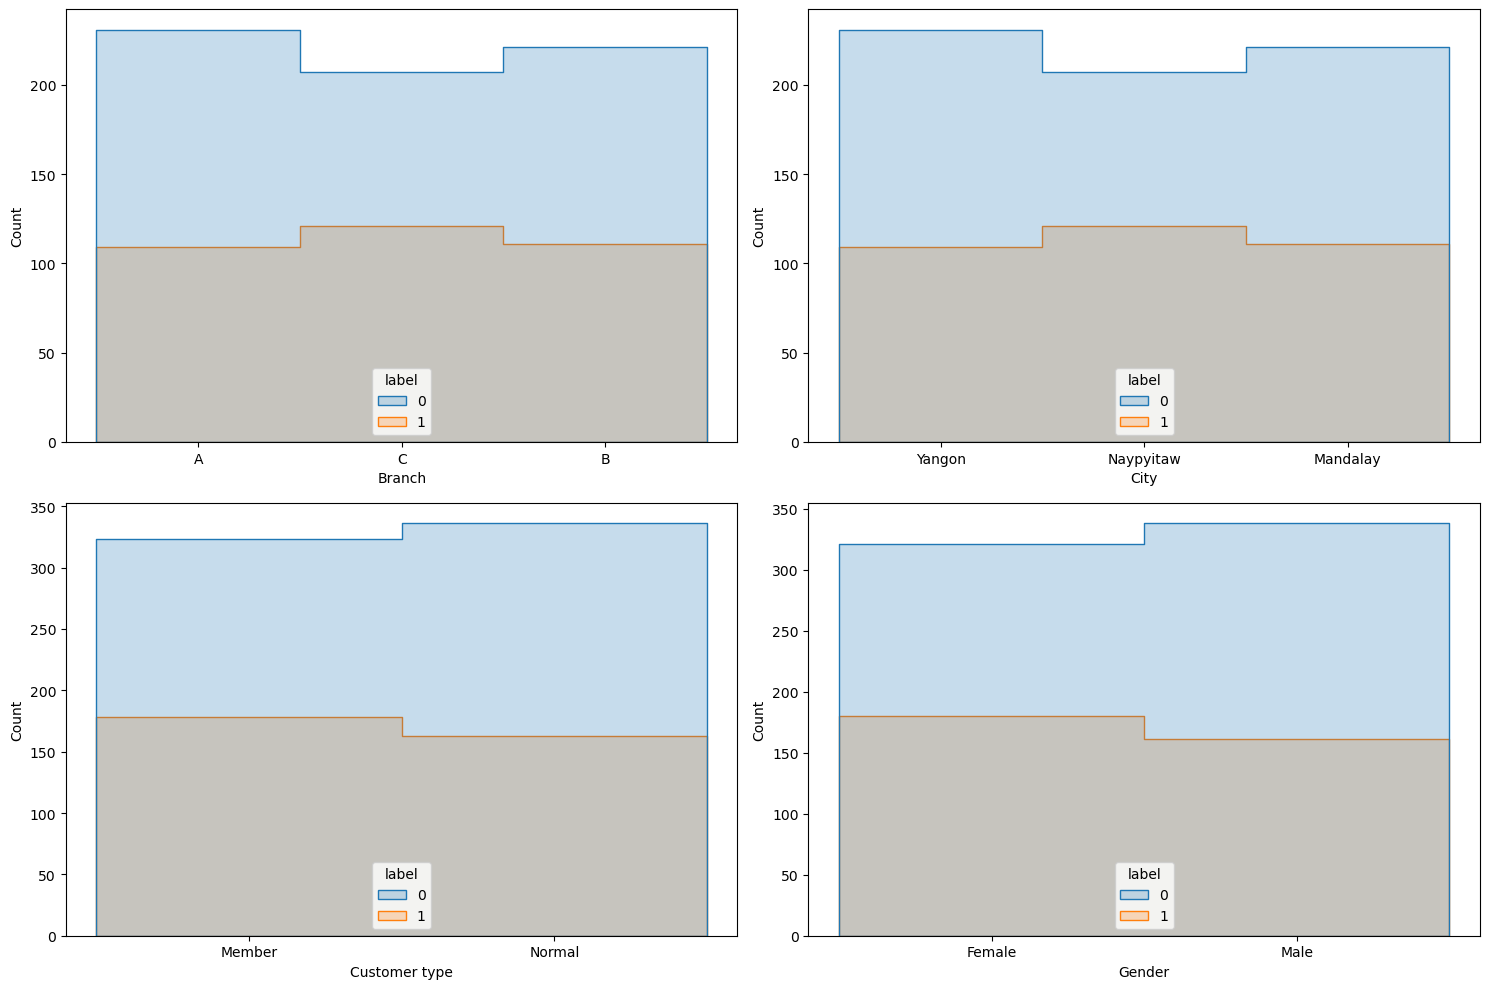

In [5]:
Demographic_features = ['Branch', 'City', 'Customer type', 'Gender']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(Demographic_features):
    sns.histplot(data=df, x=feature, hue='label', element="step", ax = axs[i])

plt.tight_layout()

# Data Pre-processing

In [6]:
display(df.columns)
useful_features = ['Customer type Numeric', 'Gender Numeric', 'Branch_A', 'Branch_B', 'month']

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Customer type Numeric', 'Gender Numeric', 'Branch_A',
       'Branch_B', 'Payment_Ewallet', 'Payment_Credit card',
       'Product_Health and beauty', 'Product_Electronic accessories',
       'Product_Home and lifestyle', 'Product_Sports and travel',
       'Product_Food and beverages', 'year', 'month', 'day', 'hour', 'minute',
       'label'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[useful_features], df['label'], test_size=0.33, random_state=42)

In [8]:
scaler = StandardScaler()
normalized_train_data = scaler.fit_transform(X_train)
normalized_test_data = scaler.transform(X_test)

# Modelling (Decision Tree)

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(normalized_train_data, y_train)

y_pred = dtc.predict(normalized_test_data)

Accuracy :  65.15151515151516
Report :                precision    recall  f1-score   support

           0       0.66      0.94      0.78       216
           1       0.48      0.10      0.16       114

    accuracy                           0.65       330
   macro avg       0.57      0.52      0.47       330
weighted avg       0.60      0.65      0.57       330



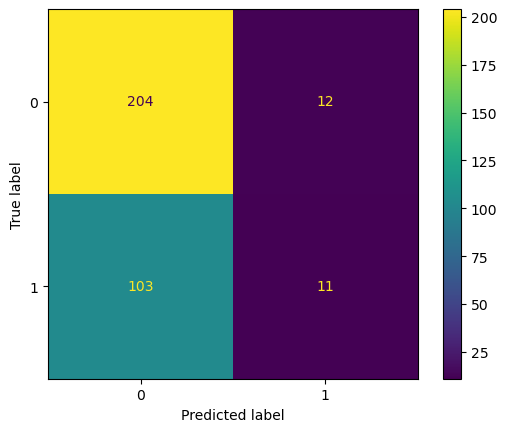

In [10]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix_result, display_labels = [0, 1])
cm_display.plot()

print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))

# Modelling (Random Forest)

In [11]:
rfc = RandomForestClassifier()
rfc.fit(normalized_train_data, y_train)

y_pred = rfc.predict(normalized_test_data)

Accuracy :  65.15151515151516
Report :                precision    recall  f1-score   support

           0       0.67      0.92      0.78       216
           1       0.48      0.14      0.22       114

    accuracy                           0.65       330
   macro avg       0.58      0.53      0.50       330
weighted avg       0.61      0.65      0.58       330



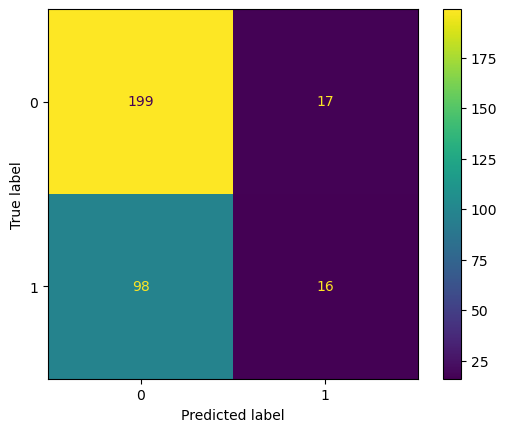

In [12]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix_result, display_labels = [0, 1])
cm_display.plot()

print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))